<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning(기계 학습)

* __지도 학습 (supervised learning)__: 레이블이 있는 데이터로 모델을 훈련시키는 것.
    * __분류(classification)__ : 클래스를 분류.
    * __회귀(regression)__: 숫자 값을 예측.
* __비지도 학습(unsuperviesd learning)__: 레이블이 없는 데이터로 모델을 훈련시키는 것.

* __강화 학습(reinforcement learning)__: 보상과 벌칙을 통해서 학습(훈련).

# 문제 정의

fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측.
* 농어의 길이(Length)로만 무게(Weight)를 예측.
* 농어의 여러가지 특성들(Length, Diagonal, ...)로 무게(Weight)를 예측.

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 사용한 예측기
from sklearn.linear_model import LinearRegression # 선형회귀 알고리즘을 사용한 예측기
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 회귀 문제에서의 평가 지표
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # 전처리 변환기 클래스
from sklearn.pipeline import Pipeline # 변환기와 추정기(예측기)를 연결해 주는 클래스

# 데이터 준비

In [ ]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# fish 데이터 프레임에서 Perch(농어)의 Weight, Length만 선택
perch = fish[fish['Species'] == 'Perch']

In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어(perch)의 길이(Length)를 알면 무게(Weight)를 예측할 수 있을까?

* 관심 변수, 종속 변수(label, target) - Weight --> 1차원 배열
* 독립 변수, 특성(features) - Length --> (컬럼이 1개인) 2차원 배열

In [ ]:
X = perch[['Length']].values # (컬럼이 1개인) 2차원 배열로 만들기 위해서
X[:5, :]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [ ]:
y = perch['Weight'].values # 1차원 배열
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련/테스트 셋 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [ ]:
y_train.shape, y_test.shape

((42,), (14,))

훈련 셋/테스트 셋 시각화(Weight ~ Length 산점도)

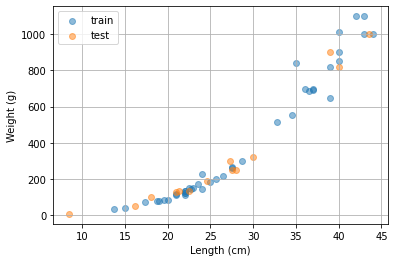

In [ ]:
plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.scatter(X_test, y_test, label='test', alpha=0.5)

plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측.

In [ ]:
knn_reg = KNeighborsRegressor() # k 기본값은 5 모델 생성

In [ ]:
knn_reg.fit(X_train, y_train) # 모델 학습

KNeighborsRegressor()

In [ ]:
# 학습된 훈련 셋의 예측값
train_pred = knn_reg.predict(X_train)
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [ ]:
# 훈련 셋의 실젯값(레이블)
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

## 훈련 셋의 평가 지표: 

* 기호 정의
    * $y_i&: &i&번째 샘플의 실젯값(label)
    * $\hat{y_i}$ : $i$번째 샘플의 예측값
    * $\bar{y_i}$ : 타겟의 평균값
    * $n$ : 샘플의 개수


* MSE(Mean Squared Errors): 오차들의 제곱의 평균
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

* RMSE(Root Mean Squared Errors): MSE에 제곱근
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

* MAE(Mean Absolute Errors): 오차들의 절댓값의 평균
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* $R^2$ score(결정 계수, coefficient of determinatnt)
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})}
               {\sum_{i=1}^{n} (y_i - \bar{y_i})}
$$

    * 일반적인 평가 지표는 점수가 높을 수록 좋은 모델, 점수가 낮을 수록 나쁜 모델.
    * 그런데, 회귀 문제에서는 오차(MSE, MAE)는 작을 수록 좋은 모델이고, 오차가 클 수록 나쁜 모델.
    * 회귀 문제에서도 점수가 높을 수록 좋은 모델이고 잠수가 낮을 수록 나쁜 모델이라고 평가할 수 있는 지표가 필요. --> $R^2$ score(결정 계수)
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측한다면 실제값 - 예측값 = 0 이므로, 결정계수는 최댓값이 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측한다면(즉, 오차가 매우 작다면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면 분자 = 분모 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하는 모델이라면(오차가 매우 크다면), 분자 > 분모 일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.
    * 즉, 결정계수는 1에 가까울 수록 오차가 작은 좋은 예측 모델이고, 숫자가 작아질 수록 오차가 큰 나쁜 예측 모델임.

In [ ]:
# 훈련 셋의 MSE, RMSE
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse

60.96323638453089

In [ ]:
# 훈련 셋의 MAE
mean_absolute_error(y_train, train_pred)

35.76190476190476

In [ ]:
# 테스트 셋의 예측값
test_pred = knn_reg.predict(X_test)

# 테스트 셋의 RMSE
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_rmse

26.865192562655704

In [ ]:
# 훈련 셋의 R^2(결정 계수)
train_r2 = r2_score(y_train, train_pred)
print('훈련 셋 R2:', train_r2)

# 테스트 셋의 R^2
test_r2 = r2_score(y_test, test_pred)
print('테스트 셋 R2:', test_r2)

훈련 셋 R2: 0.9698823289099254
테스트 셋 R2: 0.992809406101064


In [ ]:
knn_reg.score(X_test, y_test) #> score 메서드의 리턴값: R^2 score

0.992809406101064

# 모델 튜닝

k값 변화에 따른 훈련 셋과 테스트 셋에서의 $R^2$score 변화 시각화

In [ ]:
k_values = np.arange(1, 16)
train_scores = [] # 훈련 셋의 R^2 score를 저장할 리스트
test_scores = [] # 테스트 셋의 R^2 score를 저장할 리스트

for k in k_values:
  knn = KNeighborsRegressor(n_neighbors=k) # KNN 예측기 모델 생성
  knn.fit(X_train, y_train) # 모델 훈련
  train_r2 = knn.score(X_train, y_train) # 훈련 셋에서의 R^2 score
  train_scores.append(train_r2)
  test_r2 = knn.score(X_test, y_test) # 테스트 셋에서의 R^2 score
  test_scores.append(test_r2)

print(train_scores)
print(test_scores)

[0.9852830341215901, 0.9828437127041165, 0.9804899950518966, 0.978211389719245, 0.9698823289099254, 0.9757140960298665, 0.9761170732051527, 0.9697604397763201, 0.9693310367551284, 0.96164569026043, 0.9515761381539326, 0.9467103631225754, 0.9413423450130075, 0.9429470576557883, 0.930201118360776]
[0.991309195814175, 0.9725010241788556, 0.9746459963987609, 0.9840231023848637, 0.992809406101064, 0.9855001139899048, 0.9781383949643516, 0.9780541148735824, 0.9692647749722698, 0.9737908255822255, 0.970279643030474, 0.967703620310643, 0.9639044643206888, 0.9615046463124021, 0.9554827691127018]


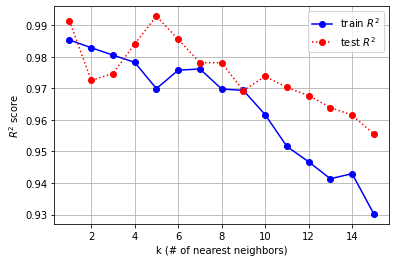

In [ ]:
plt.plot(k_values, train_scores, 'bo-', label='train $R^2$')
plt.plot(k_values, test_scores, 'ro:', label='test $R^2$')

plt.legend()
plt.grid()
plt.xlabel('k (# of nearest neighbors)')
plt.ylabel('$R^2$ score')
plt.show()

# KNN Regressor의 문제점

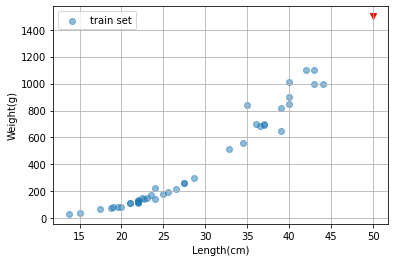

In [ ]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, label='train set', alpha=0.5)

# 길이는 50cm, 무게는 1500g인 가상의 농어(perch) 한 마리
test_fish_length = [[50]] # 특성 배열: (n_sample, n_feature) shape의 2차원 배열
test_fish_weight = [1500] # 레이블 배열: (n_sample, ) shape의 1차원 배열
plt.scatter(test_fish_length, test_fish_weight, marker='v', color='red')

plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [ ]:
# k=3 KNN regressor 생성, 훈련, 예측
knn = KNeighborsRegressor(n_neighbors=3) # 모델 생성
knn.fit(X_train, y_train) # 모델 훈련
prediction = knn.predict(test_fish_length)
print(prediction)

[1033.33333333]


* 머신 러닝 알고리즘
    * 사례 기반 학습(instance-based learning) : KNN
        * 샘플들의 다수결 또는 평균으로 예측하는 알고리즘.
        * 특별한 수학적인 모델링이 사용되지 않는 알고리즘.
        * 장점: 이해하기 쉽다.
        * 단점: 이상치(outlier)에 대한 예측값은 매우 나쁘다.
    * 모델 기반 학습(model-based learning): Linear Regression
        * 훈련 셋에서 수학적인 모델을 추론(공식)해서 예측하는 알고리즘.
        

# 선형 회귀(Linear Regression)

In [ ]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [ ]:
lin_reg.fit(X_train, y_train) # 모델 훈련

LinearRegression()

선형 회귀 모델을 훈련 셋으로 학습시킨다라는 의미는 데이터들을 가장 잘 설명할 수 있는(훈련 셋과 예측값들 사이의 오차가 적어지도록 하는) 직선(곡선)의 방정식을 찾는 과정.

$$
\hat{y_i} = w_0 + w_1 \times x_i
$$

* $w_0$: 절편(intercept), 편향(bias)
* $w_1$: 계수(coefficient), 기울기(slope)
* 선형 회귀의 목적은 MSE(오차들의 제곱의 평균)이 가장 작아지는 절편($w_0$)과 계수들($w_1$)을 찾는 것.

In [ ]:
lin_reg.intercept_ # 선형 회귀 모델을 훈련시킨 후 찾은 직선의 절편

-709.0186449535477

In [ ]:
lin_reg.coef_ # 선형 회귀 모델을 훈련시킨 후 찾은 직선의 기울기

array([39.01714496])

선형 회귀 모델을 훈련시킨 후 찾은 수학적 모델(직선의 방정식)

$$
\hat{y} = -709 + 39 \times x
$$

In [ ]:
-709 + 39* 20

71

In [ ]:
-709 + 39* 50

1241

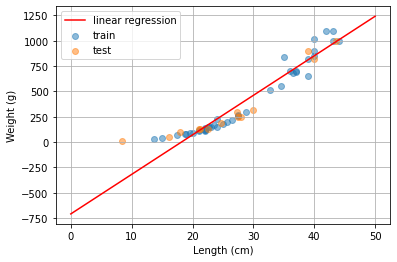

In [ ]:
# 훈련 셋, 테스트 셋, 선형 회귀 모델(직선) 시각화
plt.scatter(X_train, y_train, alpha=0.5, label='train')  # 훈련 셋
plt.scatter(X_test, y_test, alpha=0.5, label='test')     # 테스트 셋

# 직선(곡선) 시각화
x = np.arange(0, 50, 0.001)
w0 = lin_reg.intercept_ # 직선의 절편
w1 = lin_reg.coef_[0] # 직선의 y기울기
y = w0 + w1 * x
plt.plot(x, y, 'r-', label='linear regression')

plt.grid()
plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

In [ ]:
# 훈련 셋에서의 예측값
train_pred = lin_reg.predict(X_train)
print(train_pred)

[  55.71739633  149.35854425   20.60196587  -30.12032259  695.59857374
  266.40997914  851.66715359  812.65000863  968.71858848  149.35854425
   71.32425432  149.35854425  227.39283417  363.95284155  968.71858848
  851.66715359  227.39283417  110.34139928  363.95284155  851.66715359
  570.74370985  324.93569658  715.10714622 -174.48375895  176.67054572
 -123.7614705   734.6157187   656.58142877  410.7734155   207.88426169
  812.65000863  110.34139928  188.37568921  149.35854425 1007.73573345
  168.86711673   32.30710936  734.6157187   149.35854425  289.82026612
  929.70144352  637.07285629]


In [ ]:
print(y_train)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [ ]:
# 훈련 셋에서의 R^2 score
lin_reg.score(X_train, y_train)

0.939846333997604

In [ ]:
# 테스트 셋에서의 R^2 score
lin_reg.score(X_test, y_test)

0.8247503123313558

선형 회귀 모델은 훈련 셋과 테스트 셋에서 KNN Regressor보다 안 좋은 결과를 보여주고 있다. 하지만 50cm, 1500g의 가상의 농어(outlier 데이터)에 대해서는 KNN 보다 오차가 적은 예측값을 준다.

# 2차 항(polynomial)을 포함하는 선형 회귀

$$
\hat{y} = w_0 + w_1 \times x + w_2 \times x^2
$$

2차 함수에 의해서 계산된 MSE가 최소가 되는 절편과 계수들을 찾는 것.

In [ ]:
X_train.shape # 훈련 셋의 shape

(42, 1)

In [ ]:
X_train[:3, :]

array([[19.6],
       [22. ],
       [18.7]])

In [ ]:
# 특성(feature) 배열에 2차항을 추가
X_train_poly = np.c_[X_train, X_train ** 2]

In [ ]:
X_train_poly.shape

(42, 2)

In [ ]:
X_train_poly[:3, :]

array([[ 19.6 , 384.16],
       [ 22.  , 484.  ],
       [ 18.7 , 349.69]])

In [ ]:
# 테스트 셋의 특성 배열에 2차항을 추가
X_test_poly = np.c_[X_test, X_test ** 2]

In [ ]:
X_test_poly[:3, :]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25]])

In [ ]:
lin_reg2  = LinearRegression() # 선형 회귀 모델 생성

In [ ]:
lin_reg2.fit(X_train_poly, y_train) # 선형 회귀 모델 훈련

LinearRegression()

In [ ]:
# 학습 결과 - 선형 회귀식에서 절편(intercept)과 계수들(coefficients)를 찾음.
print(lin_reg2.intercept_)
print(lin_reg2.coef_)

116.05021078278384
[-21.55792498   1.01433211]


$$
\hat{y} = 116 - 21.6 \times x + 1.0 \times x^2
$$

In [ ]:
116 - 21.6 * 50 + 1.0 *50 **2

1536.0

In [ ]:
116 - 21.6 * 8 + 1.0 *8 **2

7.199999999999989

In [ ]:
# 훈련 셋의 예측값
train_pred = lin_reg2.predict(X_train_poly)
print(train_pred)

[  83.18070434  132.71260219   67.61880901   48.04150559  654.5393253
  211.05965467  876.66458663  818.09027497 1064.55950693  132.71260219
   90.62455496  132.71260219  182.91530629  290.29593158 1064.55950693
  876.66458663  182.91530629  110.65424646  290.29593158  876.66458663
  500.20932803  257.07992265  680.52990177   11.08663218  149.3605064
   20.90606071  707.0276443   604.07967051  332.83297906  169.60388118
  818.09027497  110.65424646  156.79962213  132.71260219 1131.24847547
  144.50252913   72.62352767  707.0276443   132.71260219  228.92002253
  999.89920261  579.6105922 ]


In [ ]:
# 훈련 셋의 실젯값(레이블)
print(y_train)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [ ]:
# 테스트 셋 예측값
test_pred = lin_reg2.predict(X_test_poly)
print(test_pred)

[   6.5349146    56.6511646   290.29593158  117.05874344  144.50252913
  876.66458663  382.21135986  199.55847561  818.09027497  110.65424646
 1097.65040817   33.01314491  307.66468513  283.49043666]


In [ ]:
#테스트 셋 실젯값
print(y_test)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [ ]:
# 훈련 셋 R^2 score
lin_reg2.score(X_train_poly, y_train)

0.9706807451768623

In [ ]:
# 테스트 셋 R^2 score
lin_reg2.score(X_test_poly, y_test)

0.9775935108325122

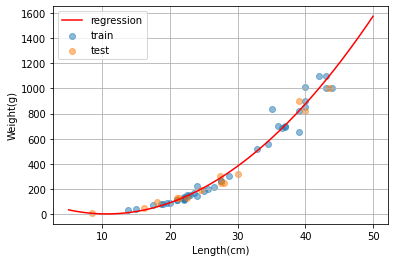

In [ ]:
# 훈련 셋, 테스트 셋, (다항) 선형 회귀 모델 시각화
plt.scatter(X_train, y_train, alpha=0.5, label='train') # 훈련 셋
plt.scatter(X_test, y_test, alpha=0.5, label='test')    # 테스트 셋

# 다항 선형 회귀 곡선 시각화
x = np.arange(5,50, 0.001)
w0 = lin_reg2.intercept_ # 2차 함수의 y절편
w1, w2 = lin_reg2.coef_  
y = w0 + w1 * x + w2 * x **2
plt.plot(x, y, 'r-',label='regression')

plt.grid()
plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

# 행렬의 점곱(dot product), 내적(inner product), 행렬 곱셈

```
(n, k) @ (k, m) = (n, m)
```

In [ ]:
A = np.arange(1, 7).reshape((3,2))
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
B = np.array([[0, 1, 2],
             [1, 2, 3]])
print(B)

[[0 1 2]
 [1 2 3]]


In [ ]:
# A @ B
# A.dot(B)
np.dot(A, B)

array([[ 2,  5,  8],
       [ 4, 11, 18],
       [ 6, 17, 28]])

In [ ]:
B @ A

array([[13, 16],
       [22, 28]])

In [ ]:
A = np.arange(6).reshape((3,2))
print(A)

[[0 1]
 [2 3]
 [4 5]]


In [ ]:
w = np.array([1,2])
print(w) # (2,)

[1 2]


In [ ]:
A @ w

array([ 2,  8, 14])

In [ ]:
X_train_poly.shape, lin_reg2.coef_.shape

((42, 2), (2,))

In [ ]:
X_test_poly.shape, lin_reg2.coef_.shape

((14, 2), (2,))

In [ ]:
lin_reg2.intercept_ + X_test_poly @ lin_reg2.coef_ # w0 + X * w1

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [ ]:
test_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

# PolynomialFeatures 변환기

scikit-learn 클래스

* Estimator(추정기, 예측기) 클래스
    * 머신 러닝 알고리즘을 구현한 클래스
    * `fit, predict, score` 메서드를 가지고 있음.
    * 예: `KNeighborsClassifier, KNeighborsRegressor, LinearRegressio`, ...
* Transformer(변환기)
    * 전처리(preprocessing) 과정에서(모델을 훈련시키기 전에) 훈련 셋과 테스트 셋의 데이터들을 변환할 때 사용하는 클래스.
    * `fit, transform, fit_transform` 메서드를 가지고 있음.
    * `StandardScaler, MinMaxScaler, PolynomialFeatures,` ...

In [ ]:
# PolynomialFeatures 변환기 클래스의 인스턴스 생성
poly = PolynomialFeatures(include_bias=False) # 2차 다항식을 만들어 주는 변환기

In [ ]:
# 훈련 셋 출력
X_train[:5, :]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [ ]:
# 훈련 셋에서 2차항(Length**2)을 추가한 데이터 셋으로 변환
X_train_2 = poly.fit_transform(X_train)
X_train_2[:5, :]

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [ ]:
# 테스트 셋에서 2차항을 추가
X_test_2 = poly.transform(X_test)
X_test_2[:5, :]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25],
       [ 21.3 , 453.69],
       [ 22.5 , 506.25]])

In [ ]:
# 3차 다항식까지 생성하는 변환기 객체 생성.
poly_3 = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
X_train_3 = poly_3.fit_transform(X_train)
X_train_3[:5, :]

array([[1.960000e+01, 3.841600e+02, 7.529536e+03],
       [2.200000e+01, 4.840000e+02, 1.064800e+04],
       [1.870000e+01, 3.496900e+02, 6.539203e+03],
       [1.740000e+01, 3.027600e+02, 5.268024e+03],
       [3.600000e+01, 1.296000e+03, 4.665600e+04]])

In [ ]:
X_test_3 = poly_3.transform(X_test)
X_test_3[:5, :]

array([[8.4000000e+00, 7.0560000e+01, 5.9270400e+02],
       [1.8000000e+01, 3.2400000e+02, 5.8320000e+03],
       [2.7500000e+01, 7.5625000e+02, 2.0796875e+04],
       [2.1300000e+01, 4.5369000e+02, 9.6635970e+03],
       [2.2500000e+01, 5.0625000e+02, 1.1390625e+04]])

## PolynomialFeatures + StandardScaler

* 다항 선형 회귀에서 차수(degree)가 커질 수록 고차항이 저차항에 비해서 예측값을 계산할 때 더 큰 영향을 미치게 됨.
* 다항 선형 회귀에서 고차항을 포함시킬 때는 일반적으로 scaling(표준화)를 함께 사용하는 경우가 많음.

In [ ]:
# 3차항까지 추가 -> 표준화
poly = PolynomialFeatures(degree=3, include_bias=False) # 다차항 추가 변환기
scaler = StandardScaler() # 표준화 변환기

In [ ]:
# 훈련 셋 변환
X_tr_poly = poly.fit_transform(X_train) # 2차항, 3차항을 추가
X_tr_poly_sc = scaler.fit_transform(X_tr_poly) # 컬럼 별로 평균과 표준편차를 찾아서 스케일 변환

In [ ]:
X_tr_poly_sc[:5, :]

array([[-1.01339619, -0.9549757 , -0.88757122],
       [-0.73842893, -0.76472563, -0.76291014],
       [-1.11650891, -1.02065999, -0.92715994],
       [-1.26544951, -1.11008743, -0.97797552],
       [ 0.86554673,  0.78258063,  0.67651527]])

In [ ]:
# 테스트 셋 변환
X_te_poly = poly.transform(X_test)
X_te_poly_sc = scaler.transform(X_te_poly)

In [ ]:
X_te_poly_sc[:5,:]

array([[-2.29657672, -1.55255604, -1.16487216],
       [-1.1967077 , -1.06961356, -0.95543049],
       [-0.10829564, -0.24593976, -0.35720728],
       [-0.81862772, -0.82248284, -0.8022618 ],
       [-0.68114409, -0.72232715, -0.73322359]])

In [ ]:
lin_reg = LinearRegression()       # 모델 생성
lin_reg.fit(X_tr_poly_sc, y_train) # 모델 훈련
train_pred = lin_reg.predict(X_tr_poly_sc)
print(train_pred)

[  76.11208213  121.32671907   64.43503022   53.03736922  676.51776072
  203.64006744  883.41268054  831.17507632 1039.71479927  121.32671907
   82.25658755  121.32671907  173.27607317  290.93930643 1039.71479927
  883.41268054  173.27607317  100.09367224  290.93930643  883.41268054
  519.14231311  254.17726522  701.95141826   59.18009181  138.11611752
   50.17607368  727.55145991  626.2376762   338.00950138  159.158376
  831.17507632  100.09367224  145.77957155  121.32671907 1091.09141922
  133.16167938   67.9916215   727.55145991  121.32671907  223.16157937
  987.85869851  601.43528834]


In [ ]:
lin_reg.score(X_tr_poly_sc, y_train) # 훈련 셋 결과 평가

0.9729178478354534

In [ ]:
lin_reg.score(X_te_poly_sc, y_test) # 테스트 셋 결과 평가

0.9588363727422972

# 다항 회귀에서 과대적합(overfitting)

100차항을 포함하는 선형 회귀

$$
\hat{y} = w_0 + w_1x + w_2x^2 + ... + w_{100}x^{100}
        = w_0 + X \cdot w
$$

In [ ]:
# Pipeline으로 연결할 변환기(Transformer), 예측기(Estimator) 객체들을 생성
poly = PolynomialFeatures(degree=60, include_bias=False) # 다차항 추가 변환기
scaler = StandardScaler() # 표준화 변환기
reg = LinearRegression() # 선형 회귀 알고리즘(모델)

In [ ]:
# 변환기와 예측기를 순서대로 연결하는 Pipeline 객체 생성
model = Pipeline(steps=[('poly_feature', poly),
                        ('std_scaler', scaler),
                        ('lin_reg', reg)])

In [ ]:
# 머신 러닝 모델을 훈련
model.fit(X_train, y_train)
#> X_train: (42, 1) shape의 2차원 배열. 훈련 셋 42마리 농어의 길이를 가지고 있는 특성 배열.
#> (1) poly_feature의 fit_transform()을 호출. -> 길이의 100차항까지 가지는 2차원 배열 변환. (42, 100) 2차원 배열
#> (2) std_scaler의 fit_transform()을 호출 -> 모든 특성들(1~100차항)에 대해서 스케일링.(42, 100) 2차원 배열.
#> (3) lin_reg의 fit()을 호출 -> 선형 회귀식을 찾음. intercept_, coef_을 찾음.

Pipeline(steps=[('poly_feature',
                 PolynomialFeatures(degree=60, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [ ]:
model.named_steps['lin_reg'].intercept_

400.8389383918388

In [ ]:
model.named_steps['lin_reg'].coef_

array([-1.65781947e+11,  2.47304146e+12, -1.69664350e+13,  6.84437750e+13,
       -1.71783603e+14,  2.53996839e+14, -1.53474006e+14, -1.15459548e+14,
        1.86883849e+14,  8.69636077e+13, -1.65843483e+14, -1.38023452e+14,
        1.05209256e+14,  1.81014042e+14,  4.83614562e+13, -1.58084449e+14,
       -1.85172772e+14,  1.98220033e+12,  1.30844751e+14,  1.81462119e+14,
        6.63047026e+13, -7.18393173e+13, -1.89663857e+14, -1.54059836e+14,
       -3.12335207e+13,  1.14772798e+14,  1.96793583e+14,  1.42712660e+14,
        5.19049009e+13, -8.78325479e+13, -1.78140934e+14, -1.89408443e+14,
       -1.04448121e+14,  1.64809285e+13,  1.38768086e+14,  2.01212189e+14,
        1.65937726e+14,  8.67995149e+13, -2.93793059e+13, -1.40311382e+14,
       -2.06750994e+14, -1.85554194e+14, -9.30499408e+13,  2.10107237e+13,
        1.39244110e+14,  2.15074334e+14,  1.88646019e+14,  1.17511066e+14,
       -1.85640092e+13, -1.45640520e+14, -2.22999015e+14, -2.06909877e+14,
       -9.34200197e+13,  

In [ ]:
train_pred = model.predict(X_train)  # 훈련된 모델로 훈련 셋 예측값 계산.
#> (1) poly_features의 transform() 호출 -> (42, 60) 변환
#> (2) std_scaler의 transform() 호출 -> 60개 특성들을 모드 스케일링.
#> (3) lin_reg의 predict() 호출 -> 예측값 계산
print(train_pred)

[  82.83893839  125.21393839   78.99518839   69.80768839  700.12800089
  186.65143839  921.77643839  735.21393839 1050.46393839  125.21393839
   89.80768839  125.21393839  183.08893839  261.99518839 1050.46393839
  921.77643839  183.08893839  109.33893839  261.99518839  921.77643839
  514.06550089  221.02643839  685.08893839   31.87018839  144.08893839
   39.87018839  695.08893839  840.03425089  300.08893839  171.21393839
  735.21393839  109.33893839  154.49518839  125.21393839 1000.58893839
  137.77643839   78.65143839  695.08893839  125.21393839  189.90143839
 1100.46393839  555.99518839]


In [ ]:
r2_score(y_train, train_pred) # 훈련 셋의 R^2 score

0.9927102007101539

In [ ]:
# 테스트 셋의 예측값
test_pred = model.predict(X_test)
print(test_pred)

[ 4.98439169e+07  7.80889384e+01  2.61995188e+02  1.13682688e+02
  1.37776438e+02  9.21776438e+02  7.21510813e+02  1.87370188e+02
  7.35213938e+02  1.09338938e+02 -2.69736412e+07  1.30995188e+02
  2.69526438e+02  2.56651438e+02]


In [ ]:
y_test # 테스트 셋의 실젯값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
r2_score(y_test, test_pred) # 테스트 셋의 R^2 score

-2285802301.920006

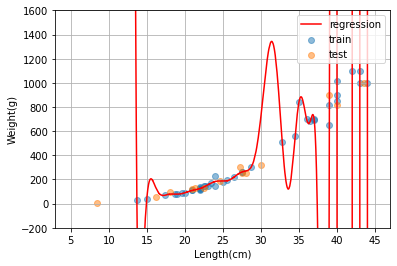

In [ ]:
# 훈련 셋, 테스트 셋, 다항 선형 회귀 곡선 시각화
plt.scatter(X_train, y_train, alpha=0.5, label='train')
plt.scatter(X_test, y_test, alpha=0.5, label='test')

# 60차 항을 포함하는 선형 회귀 곡선
x=np.arange(5, 45, 0.001).reshape((-1, 1)) # (n_samples, 1)
y= model.predict(x)
plt.plot(x, y, 'r-', label='regression')

plt.ylim((-200, 1600))
plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()